In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import json

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

In [2]:
data=pd.read_csv(r"C:\Users\A Prem kumar\Desktop\diamonds.csv")

In [3]:
data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [4]:
data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [5]:
data.shape

(53940, 10)

In [6]:
data.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [7]:
data["x"].value_counts()

x
4.37     448
4.34     437
4.33     429
4.38     428
4.32     425
        ... 
8.89       1
9.36       1
10.74      1
9.35       1
9.41       1
Name: count, Length: 554, dtype: int64

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
data.head()


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [10]:
import numpy as np


In [11]:
data[['x','y','z']]=data[['x','y','z']].replace(0,np.nan)

In [12]:
data[['x','y','z']]

,x,y,z
0,3.95,3.98,2.43
1,3.89,3.84,2.31
2,4.05,4.07,2.31
3,4.20,4.23,2.63
4,4.34,4.35,2.75
...,...,...,...
53935,5.75,5.76,3.50
53936,5.69,5.75,3.61
53937,5.66,5.68,3.56
53938,6.15,6.12,3.74


In [13]:
data.isnull().sum()

carat       0
cut         0
color       0
clarity     0
depth       0
table       0
price       0
x           8
y           7
z          20
dtype: int64

In [14]:
data.dropna(inplace=True)

In [15]:
data.shape

(53920, 10)

In [16]:

data.head()


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [17]:
usd_to_inr = 83
data["price"]=data["price"] * usd_to_inr

In [18]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,27058,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,27058,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,27141,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,27722,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,27805,4.34,4.35,2.75


In [19]:
df=data.copy()

In [20]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,27058,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,27058,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,27141,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,27722,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,27805,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,228831,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,228831,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,228831,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,228831,6.15,6.12,3.74


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53920 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53920 non-null  float64
 1   cut      53920 non-null  object 
 2   color    53920 non-null  object 
 3   clarity  53920 non-null  object 
 4   depth    53920 non-null  float64
 5   table    53920 non-null  float64
 6   price    53920 non-null  int64  
 7   x        53920 non-null  float64
 8   y        53920 non-null  float64
 9   z        53920 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


In [22]:
df.head(1)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,27058,3.95,3.98,2.43


In [23]:
cater_col=["cut","color","clarity"]
df[cater_col]=df[cater_col].astype("category")

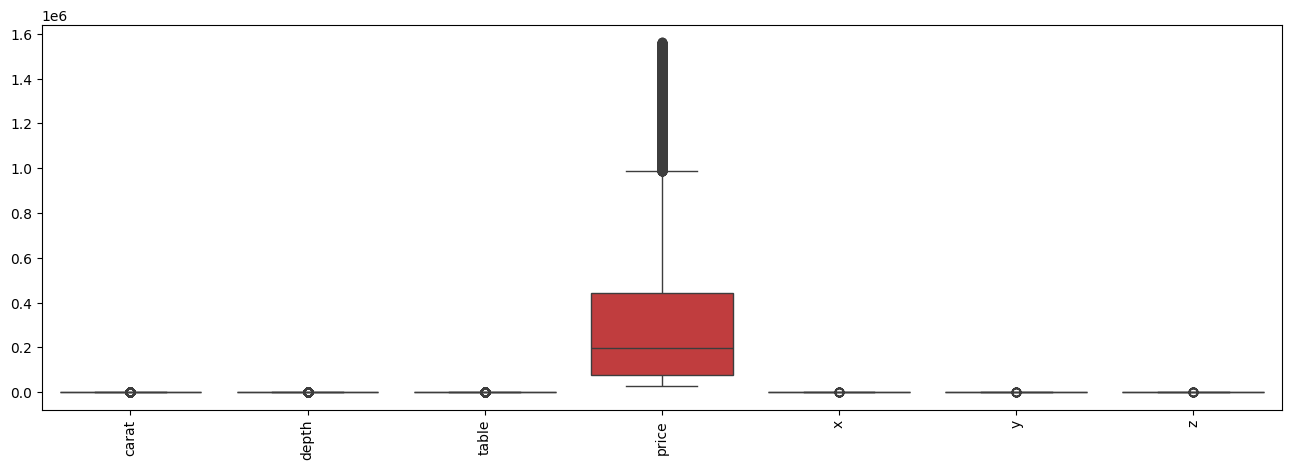

In [24]:
plt.figure(figsize=(16,5))
sns.boxplot(df)
plt.xticks(rotation=90)
plt.show()

In [25]:
cap_col=["carat",'x','y','z']

In [26]:
def iqr_outliers_capp(df,cols):
    for i in cols:
        q1=df[i].quantile(0.25)
        q3=df[i].quantile(0.75)
        iqr=q3-q1
        lower=q1-1.5*iqr
        upper=q3+1.5*iqr
        df[i]=df[i].clip(lower,upper)
    return df
df=iqr_outliers_capp(df,cap_col)


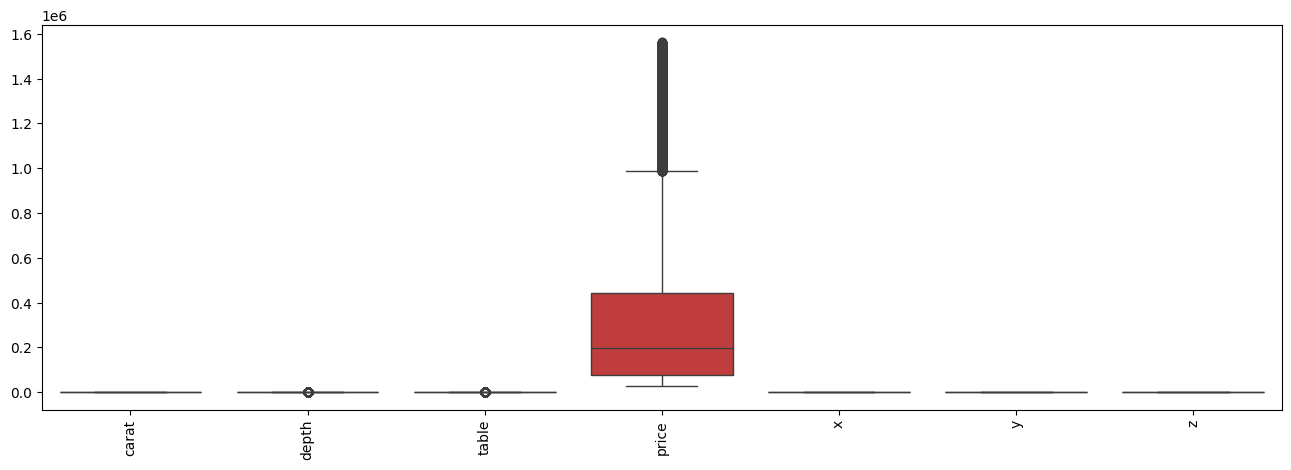

In [27]:
plt.figure(figsize=(16,5))
sns.boxplot(df)
plt.xticks(rotation=90)
plt.show()

In [28]:
numeric=df.select_dtypes(include=["number"]).columns

In [29]:
df[numeric].skew()

carat    0.900140
depth   -0.081726
table    0.796799
price    1.618349
x        0.394005
y        0.389764
z        0.387111
dtype: float64

In [30]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,27058,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,27058,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,27141,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,27722,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,27805,4.34,4.35,2.75


In [31]:
df["price"]=np.log1p(data["price"])

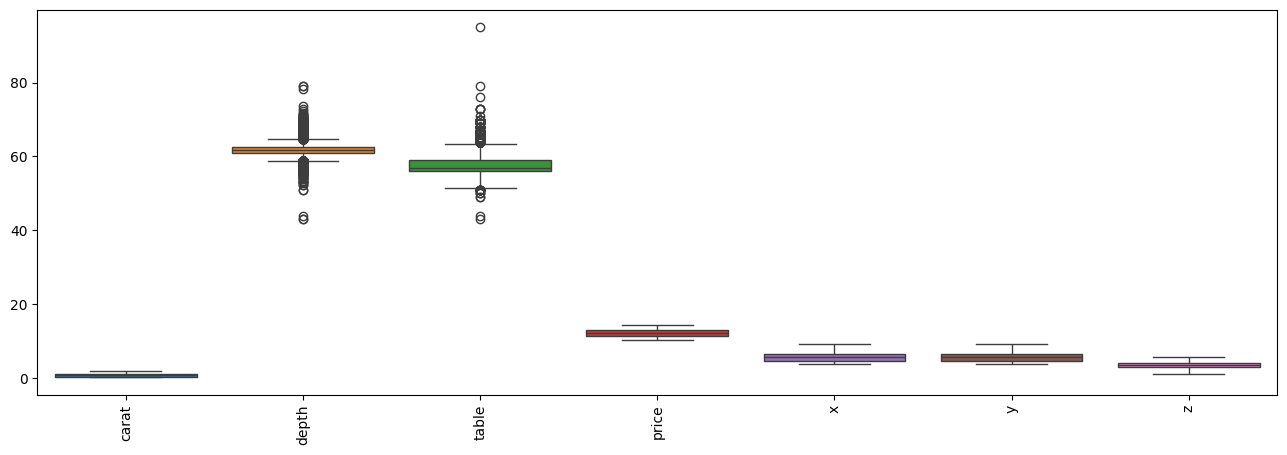

In [32]:
plt.figure(figsize=(16,5))
sns.boxplot(df)
plt.xticks(rotation=90)
plt.show()

In [33]:
df[numeric].skew()

carat    0.900140
depth   -0.081726
table    0.796799
price    0.115468
x        0.394005
y        0.389764
z        0.387111
dtype: float64

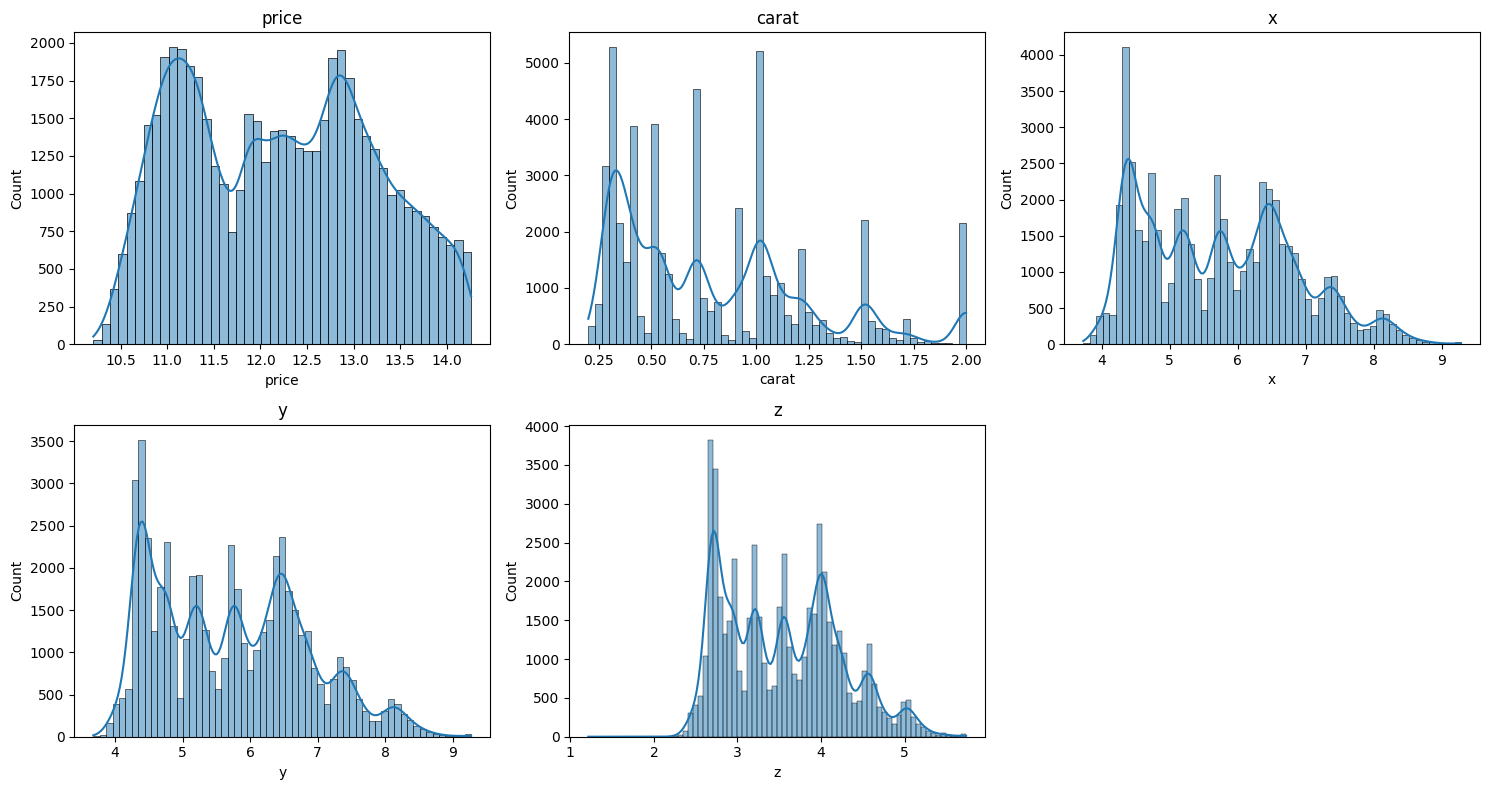

In [34]:
cols=["price","carat","x","y","z"]
plt.figure(figsize=(15,8))

for i ,col in enumerate(cols,1):
    plt.subplot(2,3,i)
    sns.histplot(df[col],kde=True)
    plt.title(col)

plt.tight_layout()
plt.show()

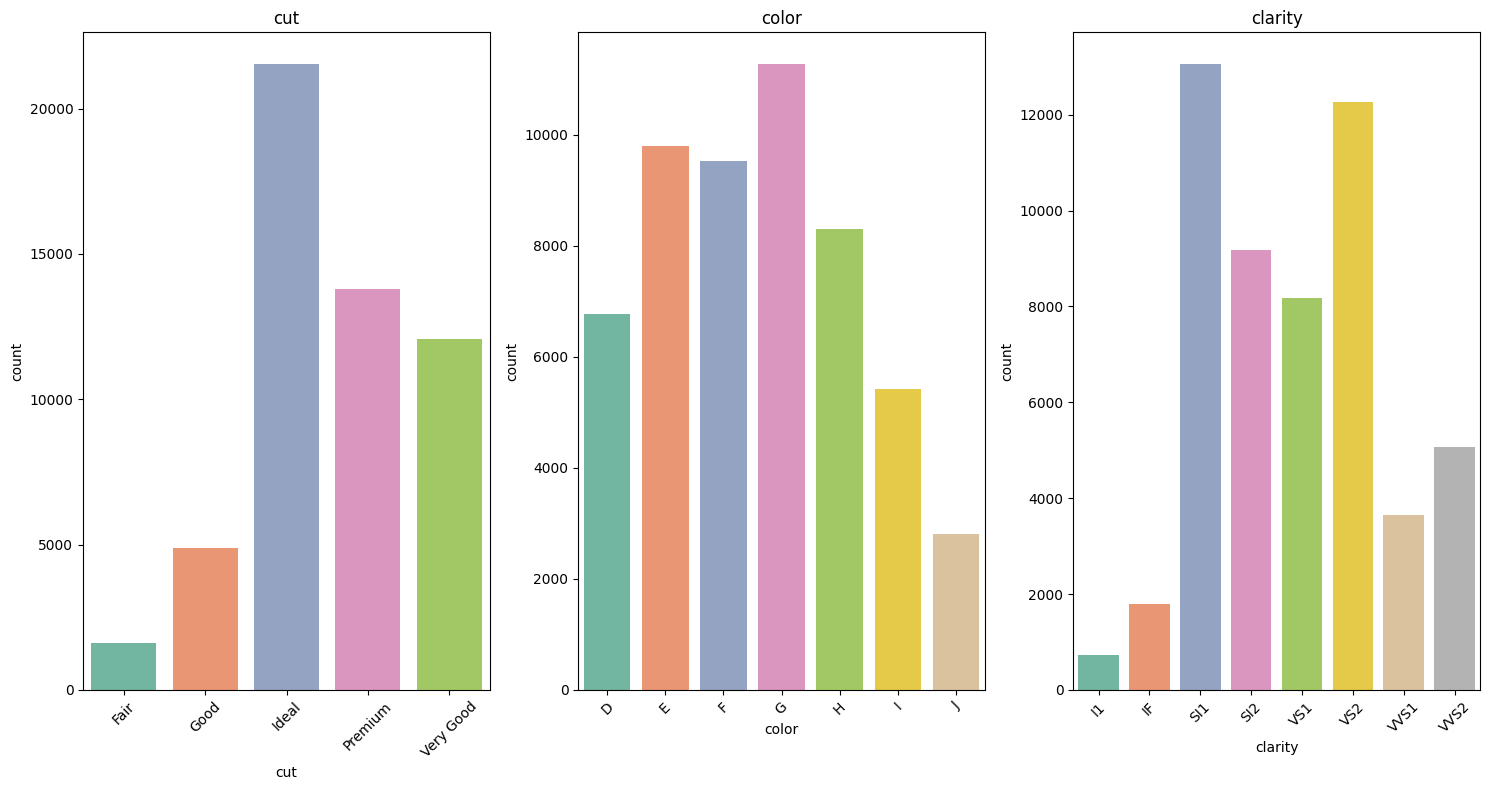

In [35]:
category_col=["cut","color","clarity"]
colors=['skyblue', 'lightgreen', 'salmon']
plt.figure(figsize=(15,8))

for i,col in enumerate(category_col,1):
    plt.subplot(1,3,i)
    plt.title(col)
    sns.countplot(x=df[col],palette='Set2')
    plt.xticks(rotation=45)

plt.tight_layout()

plt.show()

In [36]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,10.205775,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,10.205775,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,10.208838,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,10.230018,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,10.233007,4.34,4.35,2.75


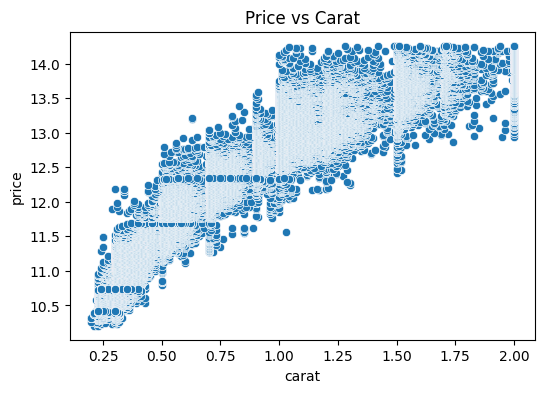

In [37]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='carat', y='price', data=df)
plt.title('Price vs Carat')
plt.show()

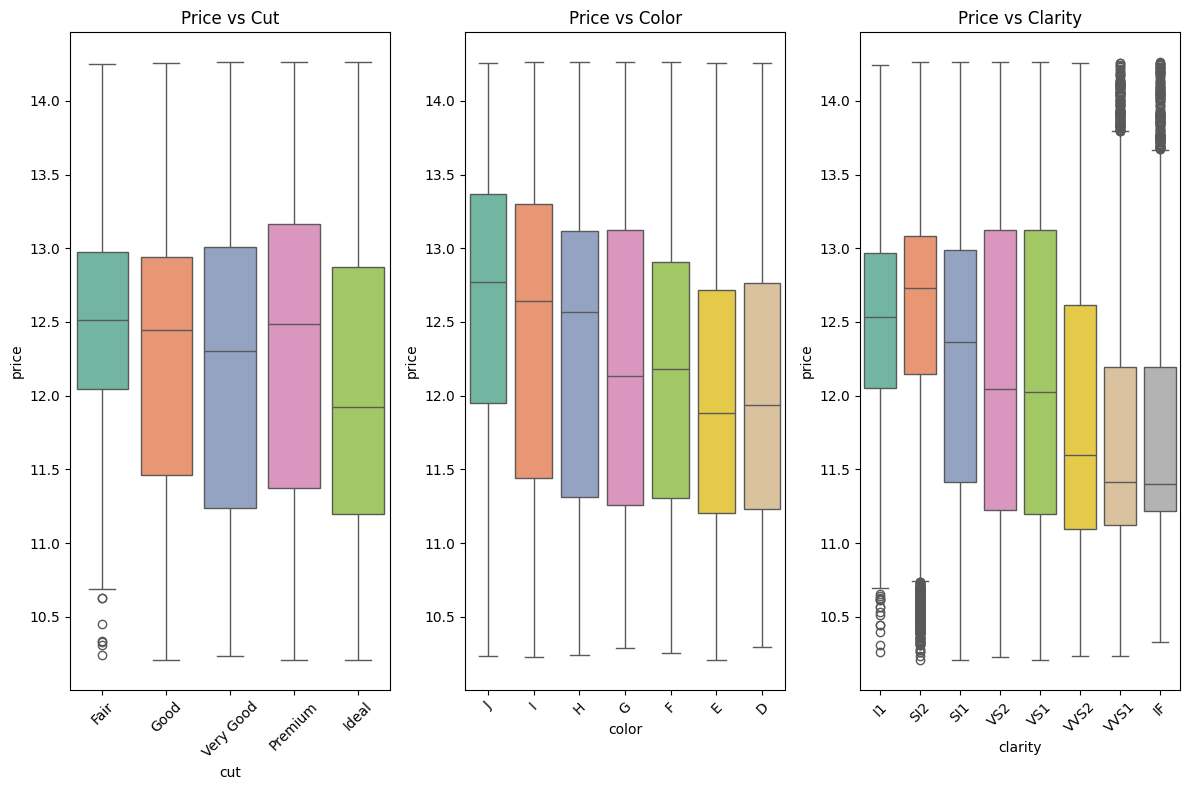

In [38]:
plt.figure(figsize=(12,8))
plt.subplot(1,3,1)
sns.boxplot(x='cut', y='price', data=df,
            order=['Fair','Good','Very Good','Premium','Ideal'],
            palette='Set2')
plt.title('Price vs Cut')
plt.xticks(rotation=45)

# Color
plt.subplot(1,3,2)
sns.boxplot(x='color', y='price', data=df,
            order=['J','I','H','G','F','E','D'],
            palette='Set2')
plt.title('Price vs Color')
plt.xticks(rotation=45)

# Clarity
plt.subplot(1,3,3)
sns.boxplot(x='clarity', y='price', data=df,
            order=['I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF'],
            palette='Set2')
plt.title('Price vs Clarity')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [39]:
corr=df[numeric].corr()

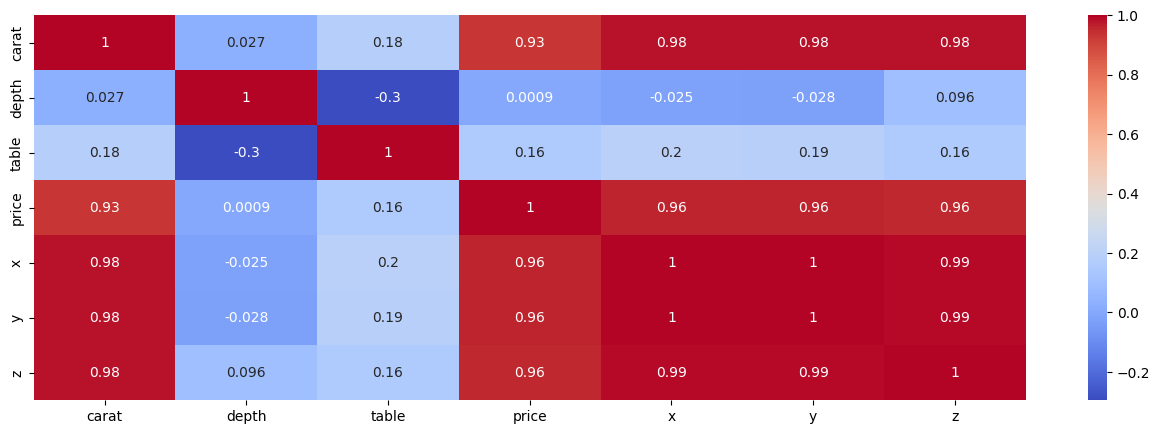

In [40]:
plt.figure(figsize=(16,5))
sns.heatmap(data=corr,annot=True,fmt=".2g",cmap="coolwarm")
plt.show()

In [41]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,27058,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,27058,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,27141,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,27722,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,27805,4.34,4.35,2.75


In [42]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,10.205775,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,10.205775,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,10.208838,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,10.230018,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,10.233007,4.34,4.35,2.75


In [43]:
df["carat"].unique()

array([0.23, 0.21, 0.29, 0.31, 0.24, 0.26, 0.22, 0.3 , 0.2 , 0.32, 0.33,
       0.25, 0.35, 0.42, 0.28, 0.38, 0.7 , 0.86, 0.71, 0.78, 0.96, 0.73,
       0.8 , 0.75, 0.74, 0.81, 0.59, 0.9 , 0.91, 0.61, 0.77, 0.63, 0.76,
       0.64, 0.72, 0.79, 0.58, 1.17, 0.6 , 0.83, 0.54, 0.98, 0.52, 1.01,
       0.53, 0.84, 0.51, 1.05, 0.55, 0.87, 1.  , 0.57, 0.82, 1.04, 0.93,
       1.2 , 0.99, 0.34, 0.43, 0.36, 0.95, 0.89, 1.02, 0.97, 0.56, 0.85,
       0.92, 1.27, 0.66, 1.12, 0.68, 1.03, 0.62, 1.22, 1.08, 0.88, 0.5 ,
       1.19, 0.39, 0.65, 1.24, 1.5 , 0.27, 0.41, 1.13, 1.06, 0.69, 0.4 ,
       1.14, 0.94, 1.29, 1.52, 1.16, 1.21, 1.23, 1.09, 0.67, 1.11, 1.1 ,
       1.18, 1.15, 1.25, 1.07, 1.28, 1.51, 0.37, 1.31, 1.26, 1.39, 1.44,
       1.35, 1.3 , 1.32, 1.41, 1.36, 1.45, 1.34, 1.58, 1.54, 1.38, 1.33,
       1.74, 1.64, 1.47, 1.4 , 1.55, 1.95, 2.  , 1.37, 1.83, 1.62, 1.57,
       1.69, 1.72, 1.66, 1.49, 1.46, 1.96, 1.7 , 1.53, 1.85, 1.68, 1.56,
       1.81, 1.65, 1.82, 1.73, 1.59, 1.42, 1.43, 1.

In [44]:
df['volume'] = df['x'] * df['y'] * df['z']
df['price_per_carat'] = df['price'] / df['carat']
df['dimension_ratio'] = (df['x'] + df['y']) / (2 * df['z'])

def carat_category(c):
    if c < 0.5: return 0
    elif c < 1.5: return 1
    else: return 2

df['carat_category'] = df['carat'].apply(carat_category)

In [45]:
cut_order = ['Fair','Good','Very Good','Premium','Ideal']
color_order = ['J','I','H','G','F','E','D']
clarity_order = ['I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF']

encoder = OrdinalEncoder(categories=[cut_order, color_order, clarity_order],handle_unknown='use_encoded_value',unknown_value=10)
df[['cut','color','clarity']] = encoder.fit_transform(df[['cut','color','clarity']])


In [46]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z,volume,price_per_carat,dimension_ratio,carat_category
0,0.23,4.0,5.0,1.0,61.5,55.0,10.205775,3.95,3.98,2.43,38.202030,44.372935,1.631687,0
1,0.21,3.0,5.0,2.0,59.8,61.0,10.205775,3.89,3.84,2.31,34.505856,48.598928,1.673160,0
2,0.23,1.0,5.0,4.0,56.9,65.0,10.208838,4.05,4.07,2.31,38.076885,44.386251,1.757576,0
3,0.29,3.0,1.0,3.0,62.4,58.0,10.230018,4.20,4.23,2.63,46.724580,35.275923,1.602662,0
4,0.31,1.0,0.0,1.0,63.3,58.0,10.233007,4.34,4.35,2.75,51.917250,33.009700,1.580000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,4.0,6.0,2.0,60.8,57.0,12.340743,5.75,5.76,3.50,115.920000,17.139921,1.644286,1
53936,0.72,1.0,6.0,2.0,63.1,55.0,12.340743,5.69,5.75,3.61,118.110175,17.139921,1.584488,1
53937,0.70,2.0,6.0,2.0,62.8,60.0,12.340743,5.66,5.68,3.56,114.449728,17.629633,1.592697,1
53938,0.86,3.0,2.0,1.0,61.0,58.0,12.340743,6.15,6.12,3.74,140.766120,14.349702,1.640374,1


In [47]:
x=df.drop("price",axis=1)
y=df["price"]

In [48]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=90)

In [49]:
y_train

14396    10.824089
32176    11.087084
43454    11.673734
25736    14.011924
39744    11.415533
           ...    
9543     12.856993
6819     12.741966
5750     12.686293
35502    11.225683
36716    11.278468
Name: price, Length: 43136, dtype: float64

In [50]:
# method-1
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=200),
    "KNN": KNeighborsRegressor(),
    "XGBoost": XGBRegressor()
}

best_model = None
best_score = -1

for name, model in models.items():
    model.fit(x_train, y_train)
    score = r2_score(y_test, model.predict(x_test))
    print(name, "R2:", score)
    if score > best_score:
        best_score = score
        best_model = model
print("Best Model:", best_model.__class__.__name__, "with R2:", best_score)

Linear Regression R2: 0.9821202894823264
Decision Tree R2: 0.9916287889315958
Random Forest R2: 0.9959556125799455
KNN R2: 0.9847182134603466
XGBoost R2: 0.9955131303117589
Best Model: RandomForestRegressor with R2: 0.9959556125799455


In [51]:
ds=data.copy()

In [52]:
ds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,27058,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,27058,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,27141,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,27722,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,27805,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,228831,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,228831,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,228831,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,228831,6.15,6.12,3.74


In [53]:
#------------------------
#No transformaion on target
def iqr_outliers_capp(ds,cols):
    for i in cols:
        q1=ds[i].quantile(0.25)
        q3=ds[i].quantile(0.75)
        iqr=q3-q1
        lower=q1-1.5*iqr
        upper=q3+1.5*iqr
        ds[i]=ds[i].clip(lower,upper)
    return ds
ds=iqr_outliers_capp(ds,cap_col)


In [54]:
data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,27058,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,27058,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,27141,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,27722,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,27805,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,228831,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,228831,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,228831,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,228831,6.15,6.12,3.74


In [55]:
ds['volume'] = ds['x'] * ds['y'] * ds['z']
ds['price_per_carat'] = ds['price'] / ds['carat']
ds['dimension_ratio'] = (ds['x'] + ds['y']) / (2 * ds['z'])

def carat_category(c):
    if c < 0.5: return 0
    elif c < 1.5: return 1
    else: return 2

ds['carat_category'] = ds['carat'].apply(carat_category)

In [56]:
cater_col=["cut","color","clarity"]
ds[cater_col]=ds[cater_col].astype("category")

In [57]:
ds

,carat,cut,color,clarity,depth,table,price,x,y,z,volume,price_per_carat,dimension_ratio,carat_category
0,0.23,Ideal,E,SI2,61.5,55.0,27058,3.95,3.98,2.43,38.202030,117643.478261,1.631687,0
1,0.21,Premium,E,SI1,59.8,61.0,27058,3.89,3.84,2.31,34.505856,128847.619048,1.673160,0
2,0.23,Good,E,VS1,56.9,65.0,27141,4.05,4.07,2.31,38.076885,118004.347826,1.757576,0
3,0.29,Premium,I,VS2,62.4,58.0,27722,4.20,4.23,2.63,46.724580,95593.103448,1.602662,0
4,0.31,Good,J,SI2,63.3,58.0,27805,4.34,4.35,2.75,51.917250,89693.548387,1.580000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,228831,5.75,5.76,3.50,115.920000,317820.833333,1.644286,1
53936,0.72,Good,D,SI1,63.1,55.0,228831,5.69,5.75,3.61,118.110175,317820.833333,1.584488,1
53937,0.70,Very Good,D,SI1,62.8,60.0,228831,5.66,5.68,3.56,114.449728,326901.428571,1.592697,1
53938,0.86,Premium,H,SI2,61.0,58.0,228831,6.15,6.12,3.74,140.766120,266082.558140,1.640374,1


In [58]:
cut_order = ['Fair','Good','Very Good','Premium','Ideal']
color_order = ['J','I','H','G','F','E','D']
clarity_order = ['I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF']

encoder = OrdinalEncoder(categories=[cut_order, color_order, clarity_order],handle_unknown='use_encoded_value',unknown_value=10)
ds[['cut','color','clarity']] = encoder.fit_transform(ds[['cut','color','clarity']])


In [59]:
x=ds.drop("price",axis=1)
y=ds["price"]

In [60]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=90)

In [61]:
ds

,carat,cut,color,clarity,depth,table,price,x,y,z,volume,price_per_carat,dimension_ratio,carat_category
0,0.23,4.0,5.0,1.0,61.5,55.0,27058,3.95,3.98,2.43,38.202030,117643.478261,1.631687,0
1,0.21,3.0,5.0,2.0,59.8,61.0,27058,3.89,3.84,2.31,34.505856,128847.619048,1.673160,0
2,0.23,1.0,5.0,4.0,56.9,65.0,27141,4.05,4.07,2.31,38.076885,118004.347826,1.757576,0
3,0.29,3.0,1.0,3.0,62.4,58.0,27722,4.20,4.23,2.63,46.724580,95593.103448,1.602662,0
4,0.31,1.0,0.0,1.0,63.3,58.0,27805,4.34,4.35,2.75,51.917250,89693.548387,1.580000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,4.0,6.0,2.0,60.8,57.0,228831,5.75,5.76,3.50,115.920000,317820.833333,1.644286,1
53936,0.72,1.0,6.0,2.0,63.1,55.0,228831,5.69,5.75,3.61,118.110175,317820.833333,1.584488,1
53937,0.70,2.0,6.0,2.0,62.8,60.0,228831,5.66,5.68,3.56,114.449728,326901.428571,1.592697,1
53938,0.86,3.0,2.0,1.0,61.0,58.0,228831,6.15,6.12,3.74,140.766120,266082.558140,1.640374,1


In [62]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=200),
    "KNN": KNeighborsRegressor(),
    "XGBoost": XGBRegressor()
}

best_model = None
best_score = -1

for name, model in models.items():
    model.fit(x_train, y_train)
    score = r2_score(y_test, model.predict(x_test))
    print(name, "R2:", score)
    if score > best_score:
        best_score = score
        best_model = model
print("Best Model:", best_model.__class__.__name__, "with R2:", best_score)

Linear Regression R2: 0.9866475920069232
Decision Tree R2: 0.9995470678022692
Random Forest R2: 0.999796493594414
KNN R2: 0.9358389290116712
XGBoost R2: 0.9994575381278992
Best Model: RandomForestRegressor with R2: 0.999796493594414


In [63]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=200),
    "KNN": KNeighborsRegressor(),
    "XGBoost": XGBRegressor()
}

best_model = None
best_test_score = -1

for name, model in models.items():
    model.fit(x_train, y_train)
    
    train_pred = model.predict(x_train)
    test_pred = model.predict(x_test)
    
    train_r2 = r2_score(y_train, train_pred)
    test_r2 = r2_score(y_test, test_pred)
    
    print(f"{name}")
    print(f"Train R2: {train_r2}")
    print(f"Test R2:  {test_r2}")
    print("-" * 30)
    
    if test_r2 > best_test_score:
        best_test_score = test_r2
        best_model = model

print("Best Model:", best_model.__class__.__name__, 
      "with Test R2:", best_test_score)

Linear Regression
Train R2: 0.9869327281768282
Test R2:  0.9866475920069232
------------------------------
Decision Tree
Train R2: 1.0
Test R2:  0.9992234204583492
------------------------------
Random Forest
Train R2: 0.9999587132941834
Test R2:  0.9997970940645446
------------------------------
KNN
Train R2: 0.9629512514308676
Test R2:  0.9358389290116712
------------------------------
XGBoost
Train R2: 0.9998778700828552
Test R2:  0.9994575381278992
------------------------------
Best Model: RandomForestRegressor with Test R2: 0.9997970940645446


In [64]:
# method-2
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

results = []

for name, model in models.items():
    model.fit(x_train, y_train)
    
    # Predictions
    train_preds = model.predict(x_train)
    test_preds = model.predict(x_test)
    
    results.append({
        "Model": name,
        
        # Train Metrics
        "Train MAE": mean_absolute_error(y_train, train_preds),
        "Train RMSE": np.sqrt(mean_squared_error(y_train, train_preds)),
        "Train R2": r2_score(y_train, train_preds),
        
        
        # Test Metrics
        "Test MAE": mean_absolute_error(y_test, test_preds),
        "Test RMSE": np.sqrt(mean_squared_error(y_test, test_preds)),
        "Test R2": r2_score(y_test, test_preds)
    })

df_results = pd.DataFrame(results).sort_values(by="Test R2", ascending=False)
df_results

,Model,Train MAE,Train RMSE,Train R2,Test MAE,Test RMSE,Test R2
2,Random Forest,436.968004,2061.150063,0.999961,1141.913061,4738.800606,0.999794
4,XGBoost,2231.884521,3660.023497,0.999878,2927.332275,7688.368618,0.999458
1,Decision Tree,0.000000,0.000000,1.000000,2079.641042,8359.786844,0.999359
0,Linear Regression,26763.848461,37854.250686,0.986933,26756.141691,38144.759094,0.986648
3,KNN,28580.803324,63739.545549,0.962951,38549.654785,83616.287580,0.935839


In [65]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor

selector = SelectFromModel(RandomForestRegressor())
selector.fit(x_train, y_train)

selected_features = x_train.columns[selector.get_support()]
print(selected_features)

Index(['volume', 'price_per_carat'], dtype='object')


In [66]:
x_train

,carat,cut,color,clarity,depth,table,x,y,z,volume,price_per_carat,dimension_ratio,carat_category
14396,0.30,4.0,2.0,5.0,61.5,57.0,4.31,4.34,2.66,49.756364,167383.333333,1.625940,0
32176,0.39,2.0,2.0,4.0,61.7,57.0,4.65,4.68,2.88,62.674560,167489.743590,1.619792,0
43454,0.50,3.0,3.0,3.0,61.5,57.0,5.12,5.09,3.14,81.830912,234890.000000,1.625796,1
25736,1.26,3.0,6.0,5.0,60.5,58.0,6.99,7.03,4.24,208.352328,965896.031746,1.653302,1
39744,0.53,3.0,0.0,3.0,62.7,56.0,5.18,5.15,3.24,86.433480,171167.924528,1.594136,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9543,1.50,1.0,1.0,0.0,62.6,63.0,7.19,7.25,4.52,235.616300,255640.000000,1.597345,2
6819,1.01,3.0,3.0,2.0,60.0,59.0,6.51,6.47,3.89,163.845633,338409.900990,1.668380,1
5750,1.01,1.0,3.0,1.0,64.5,61.0,6.24,6.31,4.05,159.466320,320084.158416,1.549383,1
35502,0.41,2.0,5.0,2.0,60.5,63.0,4.81,4.77,2.90,66.536730,183004.878049,1.651724,0


In [67]:
data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,27058,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,27058,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,27141,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,27722,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,27805,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,228831,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,228831,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,228831,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,228831,6.15,6.12,3.74


In [68]:
cap_col=["carat",'x','y','z']
def iqr_outliers_capp(data,cols):
    for i in cols:
        q1=data[i].quantile(0.25)
        q3=data[i].quantile(0.75)
        iqr=q3-q1
        lower=q1-1.5*iqr
        upper=q3+1.5*iqr
        data[i]=data[i].clip(lower,upper)
    return data
data=iqr_outliers_capp(data,cap_col)

In [69]:
cut_order = ['Fair','Good','Very Good','Premium','Ideal']
color_order = ['J','I','H','G','F','E','D']
clarity_order = ['I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF']

encoder = OrdinalEncoder(categories=[cut_order, color_order, clarity_order],handle_unknown='use_encoded_value',unknown_value=10)
data[['cut','color','clarity']] = encoder.fit_transform(data[['cut','color','clarity']])


In [70]:
x=data.drop("price",axis=1)
y=data["price"]

In [71]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=90)

In [72]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor

selector = SelectFromModel(RandomForestRegressor())
selector.fit(x_train, y_train)

selected_features = x_train.columns[selector.get_support()]
print(selected_features)

Index(['carat', 'y'], dtype='object')


In [73]:
x_train

,carat,cut,color,clarity,depth,table,x,y,z
14396,0.30,4.0,2.0,5.0,61.5,57.0,4.31,4.34,2.66
32176,0.39,2.0,2.0,4.0,61.7,57.0,4.65,4.68,2.88
43454,0.50,3.0,3.0,3.0,61.5,57.0,5.12,5.09,3.14
25736,1.26,3.0,6.0,5.0,60.5,58.0,6.99,7.03,4.24
39744,0.53,3.0,0.0,3.0,62.7,56.0,5.18,5.15,3.24
...,...,...,...,...,...,...,...,...,...
9543,1.50,1.0,1.0,0.0,62.6,63.0,7.19,7.25,4.52
6819,1.01,3.0,3.0,2.0,60.0,59.0,6.51,6.47,3.89
5750,1.01,1.0,3.0,1.0,64.5,61.0,6.24,6.31,4.05
35502,0.41,2.0,5.0,2.0,60.5,63.0,4.81,4.77,2.90


In [74]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43136 entries, 14396 to 36716
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    43136 non-null  float64
 1   cut      43136 non-null  float64
 2   color    43136 non-null  float64
 3   clarity  43136 non-null  float64
 4   depth    43136 non-null  float64
 5   table    43136 non-null  float64
 6   x        43136 non-null  float64
 7   y        43136 non-null  float64
 8   z        43136 non-null  float64
dtypes: float64(9)
memory usage: 3.3 MB


In [75]:
x_train

,carat,cut,color,clarity,depth,table,x,y,z
14396,0.30,4.0,2.0,5.0,61.5,57.0,4.31,4.34,2.66
32176,0.39,2.0,2.0,4.0,61.7,57.0,4.65,4.68,2.88
43454,0.50,3.0,3.0,3.0,61.5,57.0,5.12,5.09,3.14
25736,1.26,3.0,6.0,5.0,60.5,58.0,6.99,7.03,4.24
39744,0.53,3.0,0.0,3.0,62.7,56.0,5.18,5.15,3.24
...,...,...,...,...,...,...,...,...,...
9543,1.50,1.0,1.0,0.0,62.6,63.0,7.19,7.25,4.52
6819,1.01,3.0,3.0,2.0,60.0,59.0,6.51,6.47,3.89
5750,1.01,1.0,3.0,1.0,64.5,61.0,6.24,6.31,4.05
35502,0.41,2.0,5.0,2.0,60.5,63.0,4.81,4.77,2.90


In [76]:
## method-3

In [ ]:
results = []

for name, model in models.items():
    model.fit(x_train, y_train)
    
    train_preds = model.predict(x_train)
    test_preds = model.predict(x_test)
    
    results.append({
        "Model": name,
        
        "Train MAE": mean_absolute_error(y_train, train_preds),
        "Train RMSE": np.sqrt(mean_squared_error(y_train, train_preds)),
        "Train R2": r2_score(y_train, train_preds),
        
        
        "Test MAE": mean_absolute_error(y_test, test_preds),
        "Test RMSE": np.sqrt(mean_squared_error(y_test, test_preds)),
        "Test R2": r2_score(y_test, test_preds)
    })

df_results = pd.DataFrame(results).sort_values(by="Test R2", ascending=False)
df_results

,Model,Train MAE,Train RMSE,Train R2,Test MAE,Test RMSE,Test R2
4,XGBoost,18405.783203,32519.520784,0.990356,22887.291016,45315.876953,0.981155
2,Random Forest,8183.088670,16637.978508,0.997476,22241.676982,45394.579483,0.981090
1,Decision Tree,36.520949,734.604005,0.999995,29077.103533,60136.946590,0.966813
3,KNN,30885.640746,57185.590046,0.970179,38278.353153,71522.803704,0.953056
0,Linear Regression,64637.831999,95645.027786,0.916578,64855.497835,96361.298823,0.914789


In [89]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=200),
    "KNN": KNeighborsRegressor(),
    "XGBoost": XGBRegressor()
}

best_model = None
best_score = -1

for name, model in models.items():
    model.fit(x_train, y_train)
    score = r2_score(y_test, model.predict(x_test))
    print(name, "R2:", score)
    if score > best_score:
        best_score = score
        best_model = model
print("Best Model:", best_model.__class__.__name__, "with R2:", best_score)

Linear Regression R2: 0.9147891041125944
Decision Tree R2: 0.9666543484340893
Random Forest R2: 0.9810217491113127
KNN R2: 0.9530561286164849
XGBoost R2: 0.9811552166938782
Best Model: XGBRegressor with R2: 0.9811552166938782


In [79]:
x_train

,carat,cut,color,clarity,depth,table,x,y,z
14396,0.30,4.0,2.0,5.0,61.5,57.0,4.31,4.34,2.66
32176,0.39,2.0,2.0,4.0,61.7,57.0,4.65,4.68,2.88
43454,0.50,3.0,3.0,3.0,61.5,57.0,5.12,5.09,3.14
25736,1.26,3.0,6.0,5.0,60.5,58.0,6.99,7.03,4.24
39744,0.53,3.0,0.0,3.0,62.7,56.0,5.18,5.15,3.24
...,...,...,...,...,...,...,...,...,...
9543,1.50,1.0,1.0,0.0,62.6,63.0,7.19,7.25,4.52
6819,1.01,3.0,3.0,2.0,60.0,59.0,6.51,6.47,3.89
5750,1.01,1.0,3.0,1.0,64.5,61.0,6.24,6.31,4.05
35502,0.41,2.0,5.0,2.0,60.5,63.0,4.81,4.77,2.90


In [80]:
!pip install keras


[notice] A new release of pip is available: 25.2 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [81]:
!pip install tensorflow


[notice] A new release of pip is available: 25.2 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [82]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
scaler_ann = StandardScaler()
X_train_s = scaler_ann.fit_transform(x_train)
X_test_s = scaler_ann.transform(x_test)

ann = Sequential([
    Dense(128, activation='relu', input_dim=X_train_s.shape[1]),
    Dense(64, activation='relu'),
    Dense(1)
])

ann.compile(optimizer='adam', loss='mse')

ann.fit(X_train_s, y_train, 
        validation_data=(X_test_s, y_test),
        epochs=30,
        batch_size=32,
        verbose=1)

Epoch 1/30
1348/1348 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 176574660608.0000 - val_loss: 88743927808.0000
Epoch 2/30
1348/1348 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 37509476352.0000 - val_loss: 17927079936.0000
Epoch 3/30
1348/1348 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 13340151808.0000 - val_loss: 10379096064.0000
Epoch 4/30
1348/1348 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 8761320448.0000 - val_loss: 7847980032.0000
Epoch 5/30
1348/1348 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 7365027328.0000 - val_loss: 7159234560.0000
Epoch 6/30
1348/1348 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 6959548928.0000 - val_loss: 6889638912.0000
Epoch 7/30
1348/1348 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 6725122048.0000 - val_loss: 6674800128.0000
Epoch 8/30
1348/1348 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 6527499776.0000 - val_loss: 6482939392.0000
Epoch 9/30
1348/1348 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 6349785600.0000 - val_loss: 6328563200.0000
Epoch 10/30
1348/1348 ━━━━━━━━━━━━━━━━━

In [84]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(x)

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled_data)

In [90]:
joblib.dump(kmeans,"cluster_model.pkl")
joblib.dump(scaler,"scaler.pkl")

['scaler.pkl']

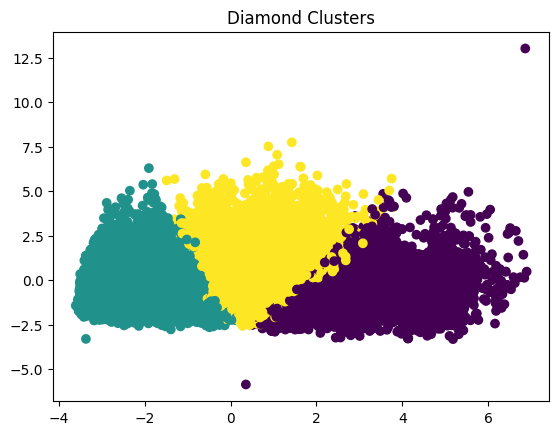

In [85]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

plt.scatter(pca_data[:,0], pca_data[:,1], c=df['cluster'])
plt.title("Diamond Clusters")
plt.show()

In [86]:
joblib.dump(best_model, "model.pkl")
joblib.dump(encoder, "encoder.pkl")


['encoder.pkl']

In [87]:
cluster_names = {
    0: "Affordable Small Diamonds",
    1: "Mid-range Balanced Diamonds",
    2: "Premium Heavy Diamonds"
}

with open("cluster_names.json", "w") as f:
    json.dump(cluster_names, f)

In [91]:
x

,carat,cut,color,clarity,depth,table,x,y,z
0,0.23,4.0,5.0,1.0,61.5,55.0,3.95,3.98,2.43
1,0.21,3.0,5.0,2.0,59.8,61.0,3.89,3.84,2.31
2,0.23,1.0,5.0,4.0,56.9,65.0,4.05,4.07,2.31
3,0.29,3.0,1.0,3.0,62.4,58.0,4.20,4.23,2.63
4,0.31,1.0,0.0,1.0,63.3,58.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...
53935,0.72,4.0,6.0,2.0,60.8,57.0,5.75,5.76,3.50
53936,0.72,1.0,6.0,2.0,63.1,55.0,5.69,5.75,3.61
53937,0.70,2.0,6.0,2.0,62.8,60.0,5.66,5.68,3.56
53938,0.86,3.0,2.0,1.0,61.0,58.0,6.15,6.12,3.74


In [92]:
y

0         27058
1         27058
2         27141
3         27722
4         27805
          ...  
53935    228831
53936    228831
53937    228831
53938    228831
53939    228831
Name: price, Length: 53920, dtype: int64